In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling 
#Load Data 

ccdata= pd.read_csv('./Data/cci30_OHLCV.csv')
ccmonthlyweights = pd.read_csv('./Data/cci30_monthly_weights.csv')

In [2]:
col_names = ["Date", "Name"]
cctop30 = pd.read_csv('./Data/cci30_components.csv', names = col_names)

In [3]:
#checking the bad line @ line 391-392, will clean later
cctop30[390:]

,Date,Name
390,2018-01-01,zcash
391,Following the closure of bitconnect exchange a...,which has revealed to be a securities fraud
392,the said coin has been removed from the index ...,and a full recomputation of the components ha...
393,2018-01-19,ardor
394,2018-01-19,binance-coin
...,...,...
809,2021-04-01,tron
810,2021-04-01,uniswap
811,2021-04-01,vechain
812,2021-04-01,wrapped-bitcoin


In [4]:
#Data Cleaning
#checking ccdata for errors

ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2342 non-null   object 
 1   Open    2342 non-null   float64
 2   High    2342 non-null   float64
 3   Low     2342 non-null   float64
 4   Close   2342 non-null   float64
 5   Volume  2341 non-null   float64
dtypes: float64(5), object(1)
memory usage: 109.9+ KB


In [5]:
# 1 missing value in volume

ccdata[ccdata['Volume'].isna()].head()

#will not drop na as there is still relevant data in other columns, will replace it with 0
ccdata.loc[ccdata['Volume'].isna(), 'Volume'] = 0
ccdata.loc[181,:]

Date      2020-11-30
Open         6327.62
High         6807.17
Low          6270.84
Close         6746.8
Volume             0
Name: 181, dtype: object

In [6]:
#convert Object to datetime and set date as index
ccdata['Date'] = pd.to_datetime(ccdata['Date'])

In [7]:
ccdata

,Date,Open,High,Low,Close,Volume
0,2021-05-30,18263.6000,19823.6000,17431.8000,19128.7000,8.993216e+10
1,2021-05-29,19265.3000,20237.8000,17487.5000,18265.0000,1.259290e+11
2,2021-05-28,21247.8000,21661.1000,18483.7000,19277.5000,1.454041e+11
3,2021-05-27,22122.7000,22549.1000,20279.3000,21177.8000,1.187111e+11
4,2021-05-26,20514.4000,22704.1000,20142.7000,22122.0000,1.417899e+11
...,...,...,...,...,...,...
2337,2015-01-05,82.3484,88.3190,81.5787,86.2289,0.000000e+00
2338,2015-01-04,89.2479,91.1656,79.8710,82.2132,0.000000e+00
2339,2015-01-03,100.2530,101.5400,88.7442,89.3769,0.000000e+00
2340,2015-01-02,99.9137,101.8690,98.7938,100.2180,0.000000e+00


In [8]:
#time to clean ccmonthlyweights

ccmonthlyweights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             2372 non-null   object
 1   Coin             2372 non-null   object
 2   Weight in Index  2372 non-null   object
dtypes: object(3)
memory usage: 55.7+ KB


In [9]:
ccmonthlyweights

,Date,Coin,Weight in Index
0,2021-05-01,bitcoin,20.9823%
1,2021-05-01,ethereum,11.4378%
2,2021-05-01,binance-coin,6.24867%
3,2021-05-01,xrp,5.42853%
4,2021-05-01,dogecoin,4.22044%
...,...,...,...
2367,2015-01-01,vertcoin,0.325175%
2368,2015-01-01,burst,0.318959%
2369,2015-01-01,emercoin,0.317036%
2370,2015-01-01,bitbay,0.290892%


In [10]:
ccmonthlyweights['Date'] = pd.to_datetime(ccmonthlyweights['Date'])

In [11]:
ccmonthlyweights

,Date,Coin,Weight in Index
0,2021-05-01,bitcoin,20.9823%
1,2021-05-01,ethereum,11.4378%
2,2021-05-01,binance-coin,6.24867%
3,2021-05-01,xrp,5.42853%
4,2021-05-01,dogecoin,4.22044%
...,...,...,...
2367,2015-01-01,vertcoin,0.325175%
2368,2015-01-01,burst,0.318959%
2369,2015-01-01,emercoin,0.317036%
2370,2015-01-01,bitbay,0.290892%


In [12]:
#Time to clean cctop30
cctop30.head()
cctop30.drop(0, inplace=True)

cctop30.reset_index(drop=True, inplace=True)

In [13]:
cctop30.head()

,Date,Name
0,2015-01-01,bitbay
1,2015-01-01,bitcoin
2,2015-01-01,bitcoindark
3,2015-01-01,bitshares
4,2015-01-01,blackcoin


In [14]:
cctop30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    813 non-null    object
 1   Name    812 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB


In [15]:
cctop30[cctop30['Name'].isna()]

,Date,Name
512,Starting from Q1 2019 the index no longer incl...,NaN


In [16]:
pd.set_option('display.max_rows',121)

In [17]:
cctop30['Name'].value_counts()

bitcoin                                                       27
litecoin                                                      27
monero                                                        27
dash                                                          26
stellar                                                       25
nem                                                           24
ethereum                                                      24
ripple                                                        21
dogecoin                                                      19
ethereum-classic                                              18
neo                                                           17
zcash                                                         17
eos                                                           16
bitcoin-cash                                                  16
iota                                                          16
tether                   

In [18]:
cctop30['Date'].value_counts()

2018-01-01                                                                          30
2015-07-01                                                                          30
2017-01-01                                                                          30
2021-01-01                                                                          30
2019-01-01                                                                          30
2016-04-01                                                                          30
2015-01-01                                                                          30
2020-01-01                                                                          30
2018-07-01                                                                          30
2015-10-01                                                                          30
2019-07-01                                                                          30
2016-07-01                                 

In [19]:
#We have some data in our data and name column that do not fit
#Drop rows with bad data

bad_row = cctop30.loc[cctop30['Date'].str.contains('the said coin') ,'Date']

cctop30.drop(bad_row.index, inplace =True)

In [20]:
bad_row = cctop30.loc[cctop30['Date'].str.contains('Starting from Q1') ,'Date']

cctop30.drop(bad_row.index, inplace =True)

bad_row = cctop30.loc[cctop30['Date'].str.contains('Following the closure') ,'Date']

cctop30.drop(bad_row.index, inplace =True)

In [21]:
cctop30['Date'].value_counts()

2018-01-01    30
2015-07-01    30
2017-01-01    30
2021-01-01    30
2019-01-01    30
2016-04-01    30
2015-01-01    30
2020-01-01    30
2018-07-01    30
2015-10-01    30
2019-07-01    30
2016-07-01    30
2021-04-01    30
2019-10-01    30
2018-04-01    30
2017-10-01    30
2016-10-01    30
2020-04-01    30
2017-04-01    30
2015-04-01    30
2018-01-19    30
2019-04-01    30
2017-07-01    30
2020-07-01    30
2016-01-01    30
2018-10-01    30
2020-10-01    30
Name: Date, dtype: int64

In [22]:
cctop30['Date'] = pd.to_datetime(cctop30['Date'])

In [23]:
cctop30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 812
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    810 non-null    datetime64[ns]
 1   Name    810 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 19.0+ KB


In [24]:
#Descriptive statistics on tables
ccdata
ccdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2342.0,3.934903e+03,5.280859e+03,57.4580,259.28750,2.900950e+03,4.479337e+03,3.347210e+04
High,2342.0,4.119265e+03,5.599330e+03,66.2862,267.46750,3.001200e+03,4.615543e+03,3.499300e+04
Low,2342.0,3.741635e+03,4.940691e+03,54.7084,251.34650,2.825540e+03,4.340630e+03,3.181280e+04
Close,2342.0,3.943099e+03,5.290711e+03,57.7205,259.20975,2.906175e+03,4.481767e+03,3.348390e+04
Volume,2342.0,2.890441e+10,4.742039e+10,0.0000,0.00000,8.837864e+09,4.091056e+10,3.780853e+11


In [25]:
#Mean of the High column by year
high_by_year = ccdata.groupby(ccdata['Date'].dt.year)['High'].mean()
high_by_year

Date
2015       84.735643
2016      219.296943
2017     3254.561258
2018     7053.777562
2019     3219.040795
2020     4282.695246
2021    20207.781067
Name: High, dtype: float64

Text(0, 0.5, 'High')

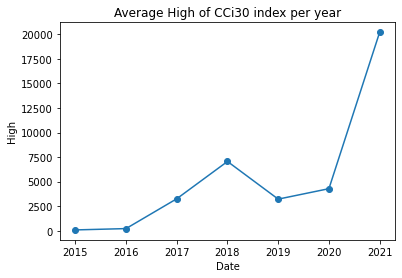

In [26]:
high_by_year.plot(kind = 'line', x = 'Date' , marker = 'o')
plt.title("Average High of CCi30 index per year")
plt.ylabel('High')

In [27]:
#Mean of Open by month and year 
high_by_month = ccdata.groupby([ccdata['Date'].dt.month, ccdata['Date'].dt.year])['High'].mean()

In [28]:
high_by_month

Date  Date
1     2015       82.581306
      2016      114.900645
      2017      327.245129
      2018    17096.600000
      2019     2200.492903
      2020     3215.263871
      2021    10244.082581
2     2015       71.826957
      2016      135.922345
      2017      364.309536
      2018    11065.335357
      2019     2175.480000
      2020     4232.994828
      2021    16160.935714
3     2015       74.578606
      2016      165.775129
      2017      512.898484
      2018     8466.880968
      2019     2469.361935
      2020     2875.952581
      2021    19323.638710
4     2015       72.695827
      2016      161.753267
      2017      807.359000
      2018     8028.595333
      2019     3171.585000
      2020     2934.999333
      2021    26802.756667
5     2015       73.895597
      2016      166.554387
      2017     1970.557097
      2018     9317.563871
      2019     3820.466129
      2020     3452.383548
      2021    28599.296667
6     2015       85.122093
      2016      2

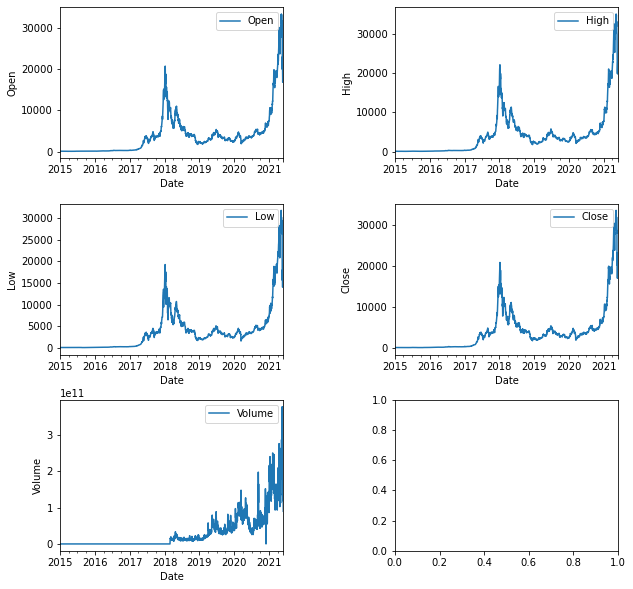

In [29]:
#plotting daily values of ccdata df
fig,ax = plt.subplots(3,2, figsize = (10,10))

ccdata.plot(kind ='line', x= 'Date', y = 'Open', ax =ax[0,0])
ax[0,0].set_ylabel('Open')

ccdata.plot(kind ='line', x= 'Date', y = 'High', ax=ax[0,1])
ax[0,1].set_ylabel('High')

ccdata.plot(kind ='line', x= 'Date', y = 'Low', ax=ax[1,0])
ax[1,0].set_ylabel('Low')

ccdata.plot(kind ='line', x= 'Date', y = 'Close', ax=ax[1,1])
ax[1,1].set_ylabel('Close')

ccdata.plot(kind ='line', x= 'Date', y = 'Volume', ax=ax[2,0])
ax[2,0].set_ylabel('Volume')

plt.subplots_adjust(wspace=0.5,hspace = 0.3)

In [30]:
#one peak in 2018, then another rise late 2020 to 2021

In [31]:
ccdateindex = ccdata.copy()

ccdateindex['month'] = ccdateindex['Date'].dt.month
ccdateindex['year'] = ccdateindex['Date'].dt.year

ccdateindex

,Date,Open,High,Low,Close,Volume,month,year
0,2021-05-30,18263.6000,19823.6000,17431.8000,19128.7000,8.993216e+10,5,2021
1,2021-05-29,19265.3000,20237.8000,17487.5000,18265.0000,1.259290e+11,5,2021
2,2021-05-28,21247.8000,21661.1000,18483.7000,19277.5000,1.454041e+11,5,2021
3,2021-05-27,22122.7000,22549.1000,20279.3000,21177.8000,1.187111e+11,5,2021
4,2021-05-26,20514.4000,22704.1000,20142.7000,22122.0000,1.417899e+11,5,2021
...,...,...,...,...,...,...,...,...
2337,2015-01-05,82.3484,88.3190,81.5787,86.2289,0.000000e+00,1,2015
2338,2015-01-04,89.2479,91.1656,79.8710,82.2132,0.000000e+00,1,2015
2339,2015-01-03,100.2530,101.5400,88.7442,89.3769,0.000000e+00,1,2015
2340,2015-01-02,99.9137,101.8690,98.7938,100.2180,0.000000e+00,1,2015


<AxesSubplot:xlabel='month', ylabel='Close'>

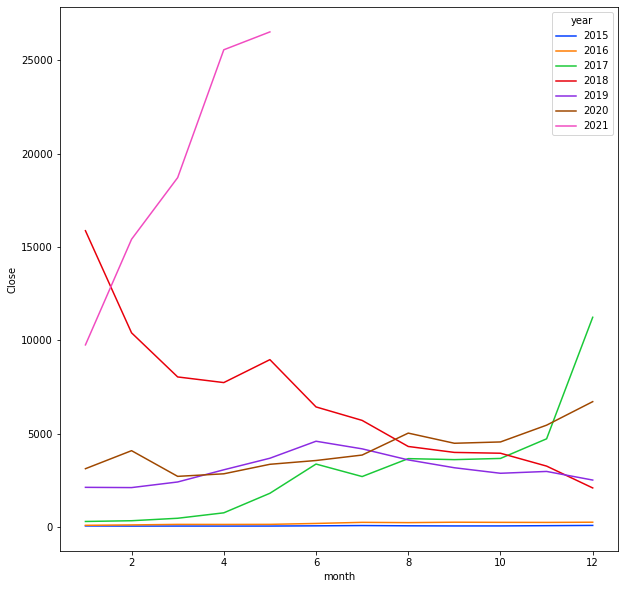

In [32]:
#plot closing price of CCI30 index by month and year
plt.figure(figsize =(10,10))
sns.lineplot(data = ccdateindex, x = 'month', y = 'Close',  hue = 'year', palette = 'bright', ci = None )


In [39]:
#Descriptive statistives for ccMonthlyweights - find out which stock on average is represented the most


ccmonthlyweights['Weight in Index'] = ccmonthlyweights['Weight in Index'].str.rstrip('%').astype('float')
ccmonthlyweights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2372 non-null   datetime64[ns]
 1   Coin             2372 non-null   object        
 2   Weight in Index  2372 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.7+ KB


In [54]:
#Average Weight of Index per Cryptocurrency
averageweight = ccmonthlyweights.groupby('Coin')['Weight in Index'].mean().sort_values(ascending = False)
averageweight

Coin
bitcoin                  29.578976
ethereum                 10.802553
ripple                    8.574262
xrp                       5.833511
bitcoin-cash              4.975669
litecoin                  4.752215
polkadot-new              3.742539
byteball                  3.436947
eos                       3.431129
cardano                   3.161020
binance-coin              3.035715
bitcoin-sv                3.031217
dash                      2.608153
stellar                   2.532804
chainlink                 2.499623
uniswap                   2.417772
tron                      2.407970
monero                    2.318205
iota                      2.295744
ethereum-classic          2.260498
maidsafecoin              2.230801
peercoin                  2.121715
neo                       2.087591
wrapped-bitcoin           2.073079
nem                       2.029909
tezos                     1.996141
bitshares                 1.971138
steem                     1.953885
unus-sed-leo   

<AxesSubplot:xlabel='Weight in Index', ylabel='Coin'>

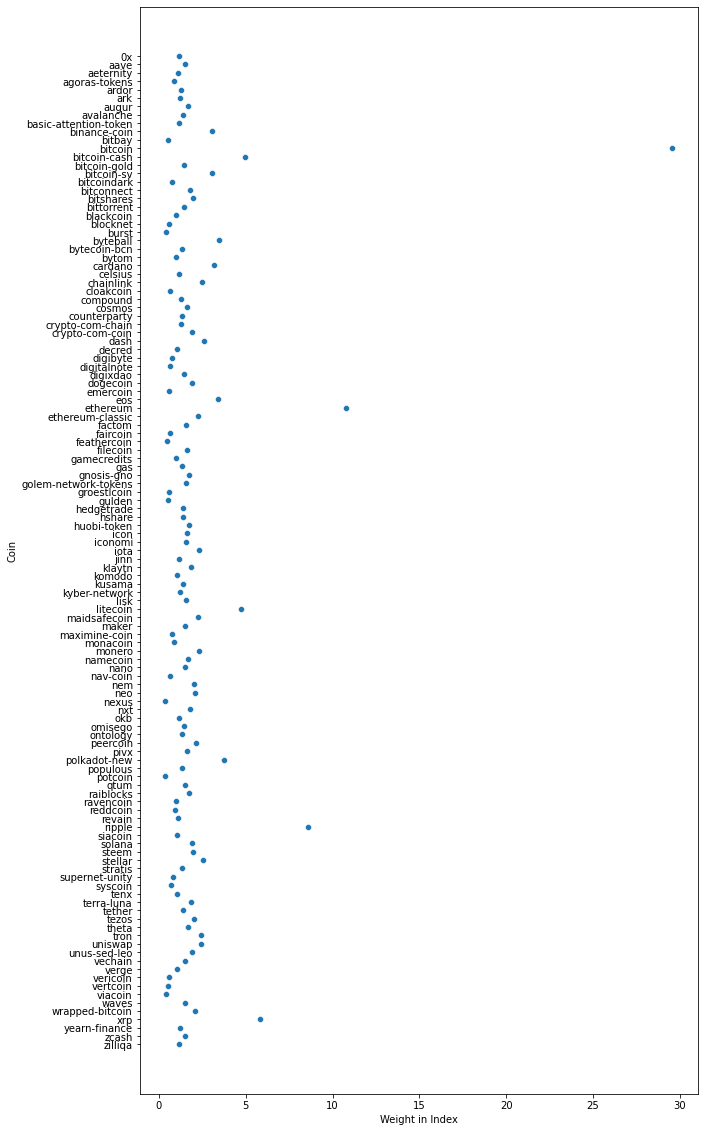

In [51]:
plt.figure(figsize = (10,20))
sns.scatterplot(data = averageweight, y= 'Coin' , x = ccmonthlyweights.groupby('Coin')['Weight in Index'].mean())